# PCA (Principal Component Aanalusis)
 **USES**:
1. To improve algorithm performence by tranforming data.
2. To Make Algorithm very fast.
3. Use for visualization of data.
4. Use for Feature Extraction.

**Components**:
1. Mean
2. STD(Standard Deviation)
3. Covariance Matrix
4. Eigen value (λ),Eigen Vectors (v).

**Steps:**
1. calculate mean of each column
    - m = mean(data).
2. Substract each column by its mean value
    - scaled_dada = data - m
3. Covariance Matrix
    - v = cov(data)
4. calculate Eigen values and Eigen Vectors
    - values, vectors = eig(scaled_data)
5. Select longest k values by sorting.
    - B = (values,vectors)
6. Transform the data
    - B.T.dot(data) ---> Multiply


In [1]:
import numpy as np

In [2]:
# data for matrix
data = np.array([[1,2],[3,4],[5,6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
#mean of each column
M = np.mean(data.T,axis=1)
M

array([3., 4.])

In [6]:
# subtraction of mean from data
scaled_data = data - M
scaled_data

array([[-2., -2.],
       [ 0.,  0.],
       [ 2.,  2.]])

In [9]:
# covariance Matrix
v = np.cov(scaled_data.T)
v

array([[4., 4.],
       [4., 4.]])

In [10]:
# eigen value and eigen vectors
values, vectors = np.linalg.eig(v)
values,vectors

(array([8., 0.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [11]:
# project the data / tranformation the data
p = vectors.T.dot(scaled_data.T)

In [12]:
p

array([[-2.82842712,  0.        ,  2.82842712],
       [ 0.        ,  0.        ,  0.        ]])

In [15]:
p.T

array([[-2.82842712,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.82842712,  0.        ]])

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
pca.fit(data)
# Vectors
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [24]:
# values
pca.explained_variance_

array([8., 0.])

In [25]:
# transform
# o/p is like subtraction of mean from data

pca.transform(data)

array([[-2.82842712e+00, -2.22044605e-16],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 2.82842712e+00,  2.22044605e-16]])

In [30]:
# PCA on Iris dataset
import pandas as pd
df  = pd.read_csv("D:\Python\ML\Datasets\Iris.csv")

In [31]:

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] =le.fit_transform(df['Species'])  

In [34]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [56]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Species'])
y = df['Species']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xtrain = pca.fit_transform(xtrain)
xtest = pca.fit_transform(xtest)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model  = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report
print('ACCURACY: ',accuracy_score(ytest,ypred))


ACCURACY:  0.9333333333333333


In [66]:
import matplotlib.pyplot as plt

array([[ 1.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -2.31514706e-16,  0.00000000e+00]])

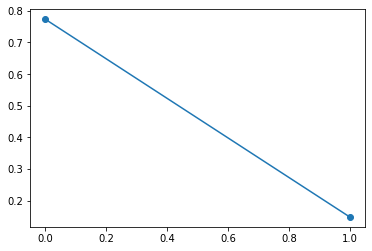

In [68]:
plt.plot(pca.explained_variance_ratio_,marker = 'o')
pca.components_
